In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'C:\Users\2bogu\Desktop\Sringboard_Materials\capstone2\data\interim')

df = pd.read_csv('post_eda') #didn't do setup time, not a big deal

In [3]:
df.head()
#cahnge num_borrowers to single_borrower

,CONTRACT DATE,SETUP DATE,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,SUCCESSOR NUMBER,ACCOUNT CODE,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Purpose,...,INTEREST RATE,DEBT TO INCOME,PAYMENT AMOUNT,TOTAL INTEREST PAID,Payments Made,avg_credit_score,MATURITY DIFFERENCE,bad,behind,paid
0,2016-10-12,2016-10-14,2031-10-12,2016-12-12,NONE,Paid in Full,2017-01-12,NONE,NONE,Solar (PV),...,3.49,0.28,61.0,51.0,180.0,744.0,177.0,False,False,True
1,2015-11-25,2015-11-30,2020-11-25,2016-07-25,NONE,Paid in Full,2016-07-25,NONE,NONE,Solar (PV),...,3.49,0.19,334.0,404.0,60.0,757.5,52.0,False,False,True
2,2015-01-15,2015-01-26,2030-01-15,2030-01-14,NONE,SurePay/Automatic Debit Payment,2015-01-26,NONE,NONE,Solar (PV),...,3.49,0.17,167.0,3726.0,64.0,785.5,0.0,False,False,False
3,2015-10-28,2015-10-31,2030-10-28,2019-07-08,NONE,Paid in Full,2019-07-09,NONE,NONE,Solar (PV),...,3.49,0.38,102.0,1307.0,180.0,792.0,135.0,False,False,True
4,2017-06-02,2017-06-12,2032-06-02,2017-08-02,NONE,Paid in Full,2017-08-29,NONE,NONE,Solar (PV),...,7.99,0.20,207.0,412.0,180.0,716.0,178.0,False,False,True


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25216 entries, 0 to 25215
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CONTRACT DATE           25216 non-null  object 
 1   SETUP DATE              25216 non-null  object 
 2   ORIGINAL MATURITY DATE  25216 non-null  object 
 3   CURRENT MATURITY DATE   25216 non-null  object 
 4   SUCCESSOR NUMBER        25216 non-null  object 
 5   ACCOUNT CODE            25216 non-null  object 
 6   ACCOUNT CODE DATE       25216 non-null  object 
 7   CANCEL REASON           25216 non-null  object 
 8   TYPE OF BANKRUPTCY      25216 non-null  object 
 9   Purpose                 25216 non-null  object 
 10  Loan Type               25216 non-null  object 
 11  Underwriting            25216 non-null  object 
 12  Pledged                 25216 non-null  object 
 13  num_borrowers           25216 non-null  int64  
 14  ORIGINAL LOAN AMOUNT    25216 non-null

# To do
- drop first 4 rows DONE
- drop account code date DONE
- bin purose catagories DONE
- num_borrowers into single_borrower DONE

In [5]:
df['Purpose'].value_counts()

Energy Efficiency (EE)            17157
Solar (PV)                         7964
Renewable Heat NY (RHNY)             53
Air Source Heat Pump (ASHP)          17
Ground Source Heat Pump (GSHP)       14
Solar Thermal                        11
Name: Purpose, dtype: int64

In [6]:
df.loc[(df['Purpose'] == 'Renewable Heat NY (RHNY)') 
       | (df['Purpose'] == 'Renewable Heat NY (RHNY)') 
       | (df['Purpose'] == 'Air Source Heat Pump (ASHP)') 
       | (df['Purpose'] == 'Ground Source Heat Pump (GSHP)')
       | (df['Purpose'] == 'Solar Thermal'), 'Purpose'] = 'Other'  

In [7]:
df['Purpose'].value_counts()

Energy Efficiency (EE)    17157
Solar (PV)                 7964
Other                        95
Name: Purpose, dtype: int64

In [8]:
df[df.Purpose == 'Other']

,CONTRACT DATE,SETUP DATE,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,SUCCESSOR NUMBER,ACCOUNT CODE,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Purpose,...,INTEREST RATE,DEBT TO INCOME,PAYMENT AMOUNT,TOTAL INTEREST PAID,Payments Made,avg_credit_score,MATURITY DIFFERENCE,bad,behind,paid
76,2016-10-17,2016-10-24,2031-10-17,2031-01-16,NONE,Check/Money Order Payment (with coupon),2016-10-24,NONE,NONE,Other,...,3.99,0.39,122.0,2102.0,52.9,689.0,9.0,False,False,False
324,2019-07-29,2019-08-05,2034-07-28,2034-07-28,NONE,SurePay/Automatic Debit Payment,2019-08-05,NONE,NONE,Other,...,6.99,0.30,60.0,383.0,10.0,786.0,0.0,False,False,False
407,2019-01-25,2019-02-04,2034-01-24,2034-01-24,NONE,SurePay/Automatic Debit Payment,2019-02-04,NONE,NONE,Other,...,6.99,0.32,54.0,544.0,16.0,767.0,0.0,False,False,False
578,2019-07-17,2019-07-29,2029-07-16,2029-07-16,NONE,SurePay/Automatic Debit Payment,2019-07-29,NONE,NONE,Other,...,6.99,0.28,88.0,469.0,11.3,743.0,0.0,False,False,False
653,2017-05-09,2017-05-15,2032-05-08,2032-06-08,NONE,SurePay/Automatic Debit Payment,2017-05-15,NONE,NONE,Other,...,3.49,0.22,25.0,344.0,36.0,695.0,-2.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23723,2018-10-09,2018-10-15,2033-10-08,2019-11-18,NONE,Paid in Full,2019-11-25,NONE,NONE,Other,...,4.99,0.31,198.0,419.0,180.0,764.0,166.0,False,False,True
24062,2018-12-12,2018-12-21,2033-12-11,2034-03-15,NONE,Check/Money Order Payment (with coupon),2018-12-21,NONE,NONE,Other,...,3.49,0.48,54.0,297.0,14.0,686.0,-4.0,False,True,False
24593,2017-01-03,2017-01-09,2032-01-03,2032-04-15,NONE,Check/Money Order Payment (with coupon),2017-01-09,NONE,NONE,Other,...,3.49,0.20,48.0,596.0,33.0,652.5,-4.0,False,True,False
24776,2019-06-20,2019-07-01,2034-06-20,2034-09-15,NONE,Check/Money Order Payment (with coupon),2019-07-01,NONE,NONE,Other,...,3.49,0.52,22.0,63.0,7.0,644.0,-3.0,False,True,False


In [9]:
df.drop(['CONTRACT DATE', 'SETUP DATE', 'ORIGINAL MATURITY DATE', 'CURRENT MATURITY DATE', 'ACCOUNT CODE DATE'], 
        axis=1, inplace=True)

In [10]:
df.loc[df.num_borrowers == 2, 'num_borrowers'] = 0 # redefining num_borrowers, move this step to different notebook

In [11]:
df['num_borrowers'].value_counts()

1    13723
0    11493
Name: num_borrowers, dtype: int64

In [12]:
df.rename(columns={'num_borrowers':'single_borrower'}, inplace=True) # MOVE THIS TOO

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25216 entries, 0 to 25215
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUCCESSOR NUMBER      25216 non-null  object 
 1   ACCOUNT CODE          25216 non-null  object 
 2   CANCEL REASON         25216 non-null  object 
 3   TYPE OF BANKRUPTCY    25216 non-null  object 
 4   Purpose               25216 non-null  object 
 5   Loan Type             25216 non-null  object 
 6   Underwriting          25216 non-null  object 
 7   Pledged               25216 non-null  object 
 8   single_borrower       25216 non-null  int64  
 9   ORIGINAL LOAN AMOUNT  25216 non-null  float64
 10  ORIGINAL TERM         25216 non-null  float64
 11  INTEREST RATE         25216 non-null  float64
 12  DEBT TO INCOME        25216 non-null  float64
 13  PAYMENT AMOUNT        25216 non-null  float64
 14  TOTAL INTEREST PAID   25216 non-null  float64
 15  Payments Made      

In [14]:
df['SUCCESSOR NUMBER'].value_counts() 
# ALL OTHER SUCCESSOR NUMBERS WERE DROPPED, MAYBE THIS IS WHY SO MANY CREDIT SCORES WERE MISSING

NONE    24895
S-0       320
s-0         1
Name: SUCCESSOR NUMBER, dtype: int64

In [15]:
df['SUCCESSOR NUMBER'] = df['SUCCESSOR NUMBER'].apply(lambda x: 0 if x == 'NONE' else 1)

In [16]:
df['SUCCESSOR NUMBER'].value_counts()

0    24895
1      321
Name: SUCCESSOR NUMBER, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25216 entries, 0 to 25215
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SUCCESSOR NUMBER      25216 non-null  int64  
 1   ACCOUNT CODE          25216 non-null  object 
 2   CANCEL REASON         25216 non-null  object 
 3   TYPE OF BANKRUPTCY    25216 non-null  object 
 4   Purpose               25216 non-null  object 
 5   Loan Type             25216 non-null  object 
 6   Underwriting          25216 non-null  object 
 7   Pledged               25216 non-null  object 
 8   single_borrower       25216 non-null  int64  
 9   ORIGINAL LOAN AMOUNT  25216 non-null  float64
 10  ORIGINAL TERM         25216 non-null  float64
 11  INTEREST RATE         25216 non-null  float64
 12  DEBT TO INCOME        25216 non-null  float64
 13  PAYMENT AMOUNT        25216 non-null  float64
 14  TOTAL INTEREST PAID   25216 non-null  float64
 15  Payments Made      

In [18]:
df['Loan Type'].value_counts()

Smart Energy        17168
On Bill Recovery     8048
Name: Loan Type, dtype: int64

In [19]:
df_d = pd.get_dummies(df)

In [20]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25216 entries, 0 to 25215
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   SUCCESSOR NUMBER                                        25216 non-null  int64  
 1   single_borrower                                         25216 non-null  int64  
 2   ORIGINAL LOAN AMOUNT                                    25216 non-null  float64
 3   ORIGINAL TERM                                           25216 non-null  float64
 4   INTEREST RATE                                           25216 non-null  float64
 5   DEBT TO INCOME                                          25216 non-null  float64
 6   PAYMENT AMOUNT                                          25216 non-null  float64
 7   TOTAL INTEREST PAID                                     25216 non-null  float64
 8   Payments Made                       

In [21]:
# ADD SCALAR AND REMOVE OUTLIERS
# Are outliers defined by the train set? like the scale is?

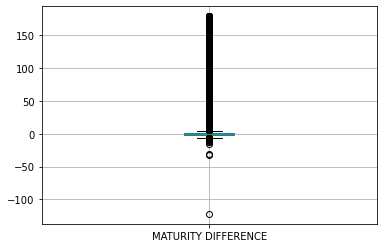

In [22]:
# Maturity difference has only potential outlier based on EDA
# another from Debt to income was removed at tehsater of EDA to make the graphs make sense

# Find the mean and standard dev
std = df['MATURITY DIFFERENCE'].std()
mean = df['MATURITY DIFFERENCE'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = df[(df['MATURITY DIFFERENCE'] < upper)  
                           & (df['MATURITY DIFFERENCE'] > lower)]

# The trimmed box plot
trimmed_df[['MATURITY DIFFERENCE']].boxplot()
plt.show()

# ALL VALUES WERE WITHIN 3 STD

In [68]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y = df_d[['MATURITY DIFFERENCE']]
X = df_d.drop('MATURITY DIFFERENCE', axis=1)



X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [24]:
X_train

,const,SUCCESSOR NUMBER,single_borrower,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,DEBT TO INCOME,PAYMENT AMOUNT,TOTAL INTEREST PAID,Payments Made,...,Loan Type_Smart Energy,Underwriting_Tier 1,Underwriting_Tier 2,Pledged_Series 2013A EE Bonds,Pledged_Series 2015A EE Bonds,Pledged_Series 2015A PV Bonds,Pledged_Series 2016A EE Bonds,Pledged_Series 2018A PV Bonds,Pledged_Series 2019A EE & PV Bonds,Pledged_Unpledged
19780,1.0,0,0,10018.0,180.0,3.49,0.34,72.0,478.0,17.0,...,1,1,0,0,0,0,0,0,1,0
6918,1.0,0,1,11150.0,180.0,4.99,0.30,88.0,645.0,124.1,...,1,1,0,0,0,0,0,0,1,0
15773,1.0,0,1,13672.0,180.0,3.49,0.52,98.0,1406.0,180.0,...,1,0,1,0,0,0,0,0,0,1
6785,1.0,0,0,9801.0,180.0,3.49,0.38,70.0,1759.0,74.0,...,1,1,0,0,1,0,0,0,0,0
1065,1.0,0,1,16222.0,180.0,3.49,0.31,116.0,2422.0,59.0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,1.0,0,0,9650.0,180.0,2.99,0.29,67.0,1693.0,89.0,...,0,1,0,1,0,0,0,0,0,0
24423,1.0,0,0,11997.0,180.0,3.49,0.30,86.0,1417.0,45.0,...,0,1,0,0,0,1,0,0,0,0
14147,1.0,0,1,3900.0,180.0,3.49,0.44,28.0,479.0,47.0,...,1,1,0,0,0,0,1,0,0,0
23320,1.0,0,1,9160.0,180.0,3.49,0.28,65.0,236.0,9.0,...,0,1,0,0,0,0,0,0,0,1


In [35]:
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
X_scaler = StandardScaler()
y_scaler = StandardScaler()

to_scale_tr = X_train[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']]
y_scale_tr = y_train[['MATURITY DIFFERENCE']]

#X_test[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']] = X_scaler.transform(X_train[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']])
#X_train.loc[:, to_scale_tr] = X_scaler.fit_transform(X_train.loc[:, to_scale_tr])
#y_train.loc[:,y_scale] = y_scaler.fit_transform(y_train.loc[:,y_scale])

#X_test.loc[:,to_scale_tr] = X_scaler.transform(X_test.loc[:,to_scale_tr])
#y_test.loc[:,y_scale] = y_scaler.transform(y_test.loc[:,y_scale])


In [37]:
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
X_scaler = StandardScaler()
y_scaler = StandardScaler()

def scaleColumns(df, cols_to_scale):
    scaler = StandardScaler()
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

X_train = scaleColumns(X_train, ['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score'])

C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [69]:
X_scaler = StandardScaler()

X_scaler.fit(X_train[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']])

StandardScaler()

In [70]:
X_train[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']] = X_scaler.transform(X_train[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']])


C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [71]:
X_train

,const,SUCCESSOR NUMBER,single_borrower,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,DEBT TO INCOME,PAYMENT AMOUNT,TOTAL INTEREST PAID,Payments Made,...,Loan Type_Smart Energy,Underwriting_Tier 1,Underwriting_Tier 2,Pledged_Series 2013A EE Bonds,Pledged_Series 2015A EE Bonds,Pledged_Series 2015A PV Bonds,Pledged_Series 2016A EE Bonds,Pledged_Series 2018A PV Bonds,Pledged_Series 2019A EE & PV Bonds,Pledged_Unpledged
19780,1.0,0,0,-0.252188,0.360325,-0.342628,0.126307,-0.379398,-0.907133,-1.072085,...,1,1,0,0,0,0,0,0,1,0
6918,1.0,0,1,-0.083270,0.360325,1.171104,-0.095490,-0.079340,-0.742925,1.080038,...,1,1,0,0,0,0,0,0,1,0
15773,1.0,0,1,0.293066,0.360325,-0.342628,1.124395,0.108196,0.005352,2.203321,...,1,0,1,0,0,0,0,0,0,1
6785,1.0,0,0,-0.284569,0.360325,-0.342628,0.348105,-0.416905,0.352451,0.073302,...,1,1,0,0,1,0,0,0,0,0
1065,1.0,0,1,0.673580,0.360325,-0.342628,-0.040041,0.445762,1.004367,-0.228116,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,1.0,0,0,-0.307101,0.360325,-0.847205,-0.150939,-0.473166,0.287554,0.374720,...,0,1,0,1,0,0,0,0,0,0
24423,1.0,0,0,0.043121,0.360325,-0.342628,-0.095490,-0.116847,0.016168,-0.509439,...,0,1,0,0,0,1,0,0,0,0
14147,1.0,0,1,-1.165122,0.360325,-0.342628,0.680801,-1.204557,-0.906150,-0.469250,...,1,1,0,0,0,0,1,0,0,0
23320,1.0,0,1,-0.380219,0.360325,-0.342628,-0.206389,-0.510673,-1.145088,-1.232841,...,0,1,0,0,0,0,0,0,0,1


In [72]:
X_test[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']] = X_scaler.transform(X_test[['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM', 'INTEREST RATE', 'DEBT TO INCOME', 'PAYMENT AMOUNT', 
            'TOTAL INTEREST PAID', 'Payments Made', 'avg_credit_score']])

C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [73]:
X_test

,const,SUCCESSOR NUMBER,single_borrower,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,DEBT TO INCOME,PAYMENT AMOUNT,TOTAL INTEREST PAID,Payments Made,...,Loan Type_Smart Energy,Underwriting_Tier 1,Underwriting_Tier 2,Pledged_Series 2013A EE Bonds,Pledged_Series 2015A EE Bonds,Pledged_Series 2015A PV Bonds,Pledged_Series 2016A EE Bonds,Pledged_Series 2018A PV Bonds,Pledged_Series 2019A EE & PV Bonds,Pledged_Unpledged
1916,1.0,0,0,-0.113711,0.360325,-0.342628,-0.317287,-0.266876,0.492077,0.013019,...,1,1,0,0,1,0,0,0,0,0
1617,1.0,0,1,-0.308892,0.360325,-0.342628,-1.204477,-0.435659,-0.106742,-0.368777,...,1,1,0,0,1,0,0,0,0,0
22321,1.0,0,0,0.993062,0.360325,-0.342628,-1.315375,0.727066,0.839175,-0.469250,...,0,1,0,0,0,1,0,0,0,0
25123,1.0,0,0,-1.026347,0.360325,-0.342628,1.179845,-1.073282,-0.872718,-0.609911,...,0,0,1,0,0,0,0,0,0,1
19180,1.0,0,0,0.048791,0.360325,-0.847205,-0.261838,-0.173108,0.763463,0.455098,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,1.0,0,0,0.354993,0.360325,-0.342628,-0.150939,0.164457,0.601221,-0.288399,...,1,1,0,0,1,0,0,0,0,0
16092,1.0,0,1,-0.661501,0.360325,0.161949,1.845237,-0.716963,-1.306346,-1.359437,...,1,0,1,0,0,0,0,0,0,1
6574,1.0,0,1,-0.439908,0.360325,-0.342628,0.126307,-0.548181,-0.246368,2.203321,...,1,1,0,1,0,0,0,0,0,0
22598,1.0,0,1,0.061923,0.360325,-0.342628,0.237206,-0.098094,0.058450,-0.489344,...,0,1,0,0,0,1,0,0,0,0


In [74]:
y_scaler = StandardScaler()

y_scaler.fit(y_train[['MATURITY DIFFERENCE']])

StandardScaler()

In [75]:
y_train[['MATURITY DIFFERENCE']] = y_scaler.transform(y_train[['MATURITY DIFFERENCE']])

C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [77]:
y_train

,MATURITY DIFFERENCE
19780,-0.423601
6918,1.621314
15773,2.271100
6785,-0.423601
1065,-0.423601
...,...
12119,-0.519157
24423,-0.538269
14147,-0.423601
23320,-0.538269


In [78]:
y_test[['MATURITY DIFFERENCE']] = y_scaler.transform(y_test[['MATURITY DIFFERENCE']])

C:\Users\2bogu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\2bogu\anaconda3\lib\site-packages\pandas\core\frame.py:3034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [79]:
y_test

,MATURITY DIFFERENCE
1916,-0.423601
1617,-0.423601
22321,-0.557380
25123,-0.480935
19180,-0.519157
...,...
8944,-0.423601
16092,-0.442712
6574,1.927095
22598,-0.557380
